In [ ]:
# Problem Statement: The Advertising dataset captures sales revenue generated with respect to advertisement spends 
# across multiple channels like radio, tv, and newspaper.
# Objective:
# Build a linear regression model to:
# • Interpret the coefficients of the model
# • Make predictions
# • Find and analyze model residuals
# • Evaluate model efficiency using RMSE and R-Square values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Advert = pd.read_csv("C:\\Users\\Phavour\\Downloads\\Personal python project\\Demo Datasets\\Lesson 4\\Advertising.csv",index_col=0)
Advert

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
# sanity checks

Advert.isna().any()

TV           False
radio        False
newspaper    False
sales        False
dtype: bool

In [4]:
Advert.duplicated().sum()

0

In [5]:
Advert.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
Advert.isnull().sum()/Advert.shape[0]*100

TV           0.0
radio        0.0
newspaper    0.0
sales        0.0
dtype: float64

In [7]:
Advert.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
# finding garbage values
for i in Advert.select_dtypes(include="object").columns:
    print(Advert[i].value_counts())
    print("***"*10)

In [9]:
Advert.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [10]:
# Exploring of data

# can include object
Advert.describe(include='all')

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


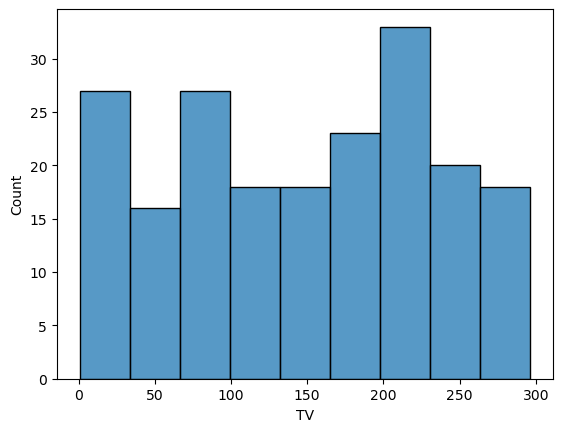

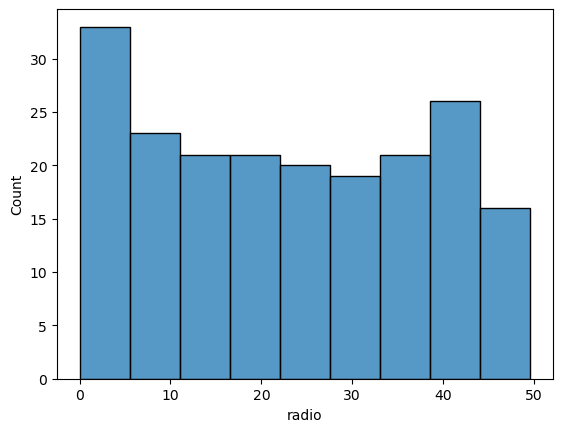

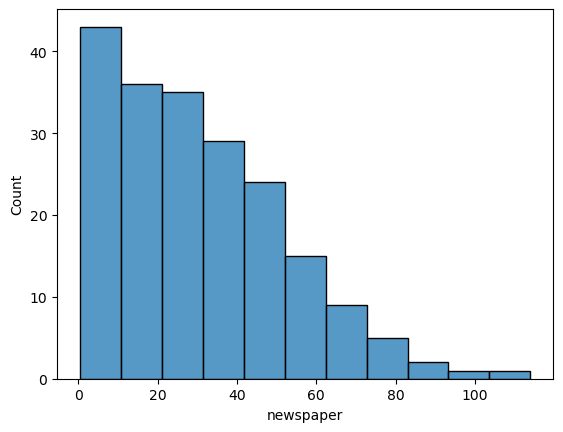

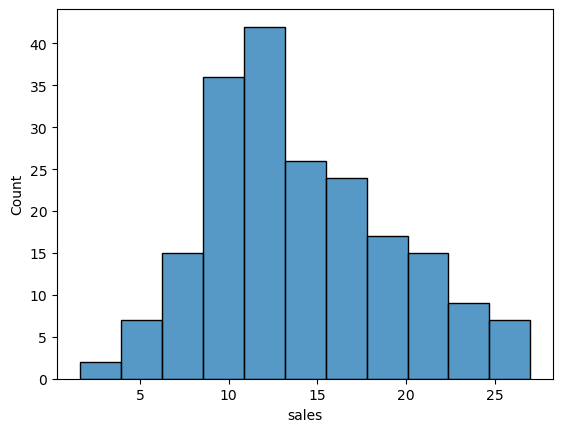

In [11]:
for i in Advert.select_dtypes(include="number").columns:
    sns.histplot(data=Advert,x=i)
    plt.show()

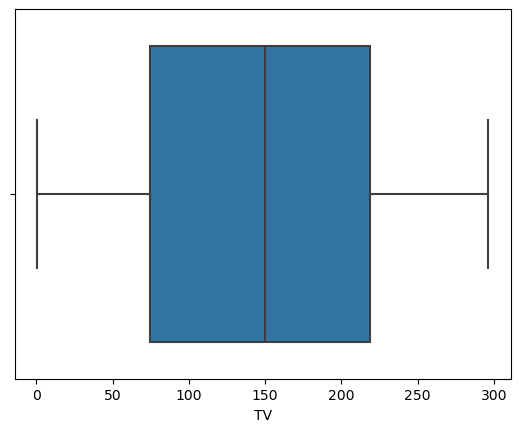

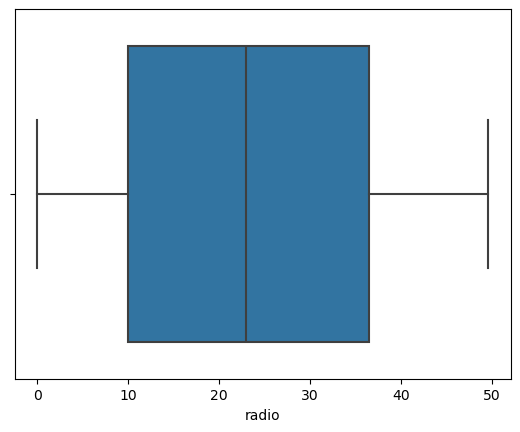

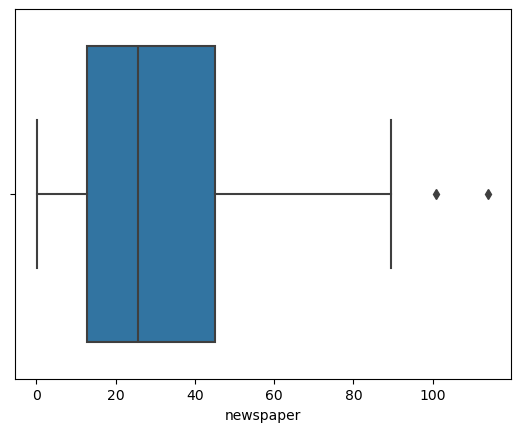

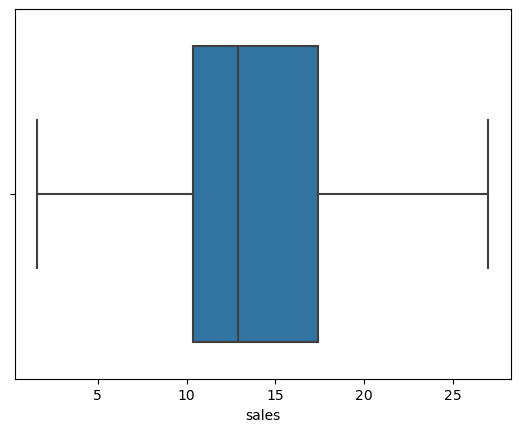

In [12]:
for i in Advert.select_dtypes(include="number").columns:
    sns.boxplot(data=Advert,x=i)
    plt.show()

In [18]:
filter = Advert['newspaper'].values<80
outlier_rem = Advert[filter]
outlier_rem

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


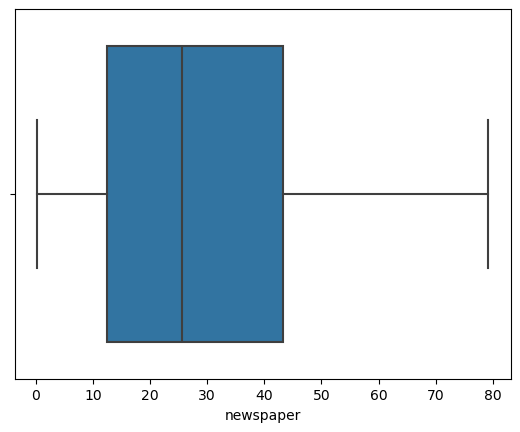

In [20]:
sns.boxplot(x=outlier_rem['newspaper'])
plt.show()

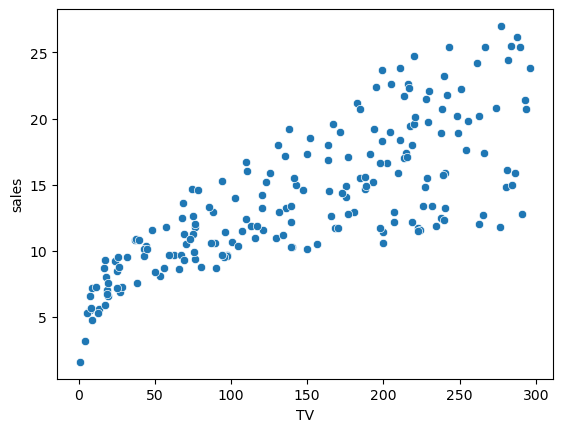

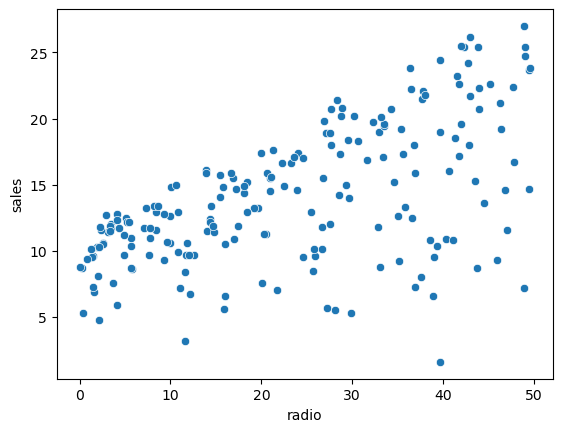

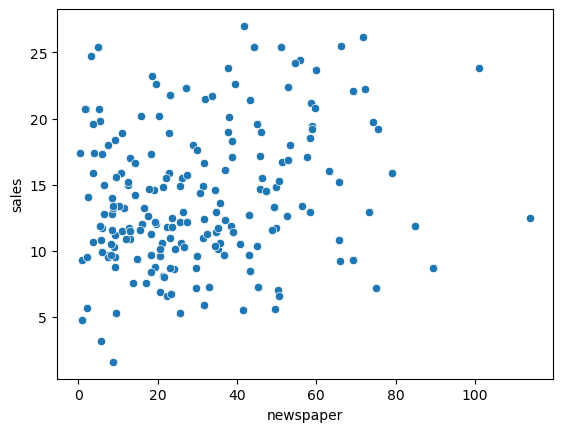

In [25]:
# checking for relationship using scatterplot

for i in['TV', 'radio', 'newspaper']:
    sns.scatterplot(data=Advert,x=i,y='sales')
    plt.show()

In [21]:
Advert.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [26]:
# creating training and testing data
from sklearn.model_selection import train_test_split

In [31]:
x_train = Advert.drop(["sales"],axis=1)
y_train = Advert["sales"]

print(x_train)
print("***"*13)
print(y_train)


        TV  radio  newspaper
1    230.1   37.8       69.2
2     44.5   39.3       45.1
3     17.2   45.9       69.3
4    151.5   41.3       58.5
5    180.8   10.8       58.4
..     ...    ...        ...
196   38.2    3.7       13.8
197   94.2    4.9        8.1
198  177.0    9.3        6.4
199  283.6   42.0       66.2
200  232.1    8.6        8.7

[200 rows x 3 columns]
***************************************
1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64


In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x_train,y_train,test_size=0.3,random_state=42)

In [38]:
print(xtest.size)
print(ytest.size)

180
60


In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)

In [46]:
model.fit(xtrain,ytrain)

LinearRegression(n_jobs=-1)

In [52]:
print(model.intercept_)
print(model.coef_)

2.70894909251591
[0.04405928 0.1992875  0.00688245]


In [48]:
print(Advert.columns.values)

['TV' 'radio' 'newspaper' 'sales']


In [53]:
print(list(zip(Advert.columns,model.coef_)))

[('TV', 0.0440592809574652), ('radio', 0.19928749689893954), ('newspaper', 0.006882452222275458)]


In [56]:
# checking the magnitude of the coefficient
predictor = Advert.columns[:-1]
predictor

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [58]:
coef = pd.Series(model.coef_,predictor).sort_values()
coef

newspaper    0.006882
TV           0.044059
radio        0.199287
dtype: float64

<Axes: title={'center': 'model coefficient'}>

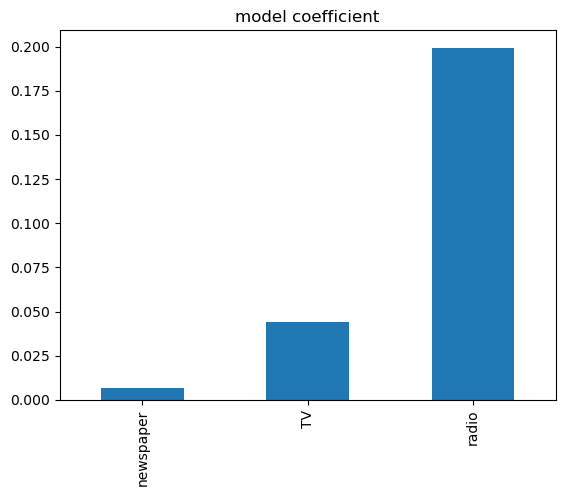

In [59]:
coef.plot(kind="bar",title="model coefficient")


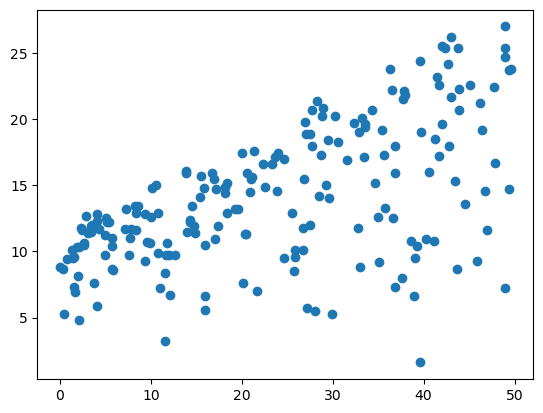

In [60]:
# checking relationship b/n radio and target var

plt.scatter(Advert["radio"],Advert["sales"])

In [61]:
# R2 Value/Coefficient of Determination
model.score(xtest,ytest)


0.8609466508230368

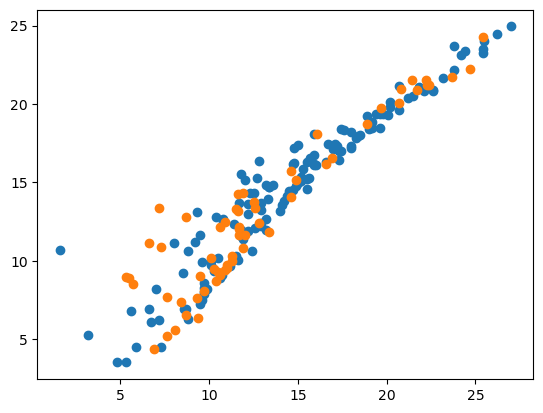

In [81]:
# final prediction
print(plt.scatter(ytrain,model.predict(xtrain)))
print(plt.scatter(ytest,model.predict(xtest)))

In [76]:
from sklearn.metrics import mean_squared_error,r2_score

np.sqrt(mean_squared_error(ytrain, model.predict(xtrain)))


1.574596830590544

In [82]:
np.sqrt(mean_squared_error(ytest,model.predict(xtest)))

1.9485372043446387

In [86]:
# checking for residuals
print()
ytest-model.predict(xtest)

96     0.334604
16     1.211772
31    -0.151071
159   -3.589238
129    2.497680
116   -0.755569
70     1.103075
171    1.049715
175   -1.775471
46    -0.224495
67     0.485570
183    2.174572
166   -2.402060
79    -3.670260
187    0.843204
178   -0.304544
57    -3.415494
153    0.443807
83     1.004171
69     0.175264
125   -0.068218
17    -1.274690
149   -1.596389
94     0.664982
66     1.691393
61     2.488020
85     0.782405
68     1.593723
126    1.519234
133   -2.814120
10    -1.576049
19     1.330806
56     1.969910
76    -4.077706
151   -2.001136
105    0.624092
136   -2.662026
138   -0.138265
165    1.060612
77     2.518094
80     1.486676
198    0.395137
39    -0.070454
25     1.609186
123   -1.563884
196    2.375645
30     1.211062
20     0.506693
144    1.709755
87     0.338802
115   -1.118484
174    0.068431
6     -6.153607
127   -4.553147
118    3.063632
74     1.238420
141    1.480429
99     1.144835
173   -0.095191
97    -0.453176
Name: sales, dtype: float64

In [89]:
pd.DataFrame({'Actual': ytest, 'Predicted': model.predict(xtest)}).head(10)

,Actual,Predicted
96,16.9,16.565396
16,22.4,21.188228
31,21.4,21.551071
159,7.3,10.889238
129,24.7,22.202320
116,12.6,13.355569
70,22.3,21.196925
171,8.4,7.350285
175,11.5,13.275471
46,14.9,15.124495
